# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## 1. Overview of the Data

In [2]:
df = pd.read_csv('../data/processed/data.csv')

In [3]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [5]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


## 2. Key Insights

Based on the initial exploration, here are the top insights:

1. **Missing Values:** The dataset has no missing values, which is great for modeling.

2. **Transaction Amounts:** The 'Amount' column has negative values, which might represent refunds or reversals. This needs further investigation.

3. **Categorical Features:** Several columns are categorical (e.g., 'ProductCategory', 'ChannelId'). These will need to be encoded for machine learning models.

4. **Fraud Distribution:** The 'FraudResult' column is the target variable. It's important to check its distribution to see if the dataset is imbalanced.

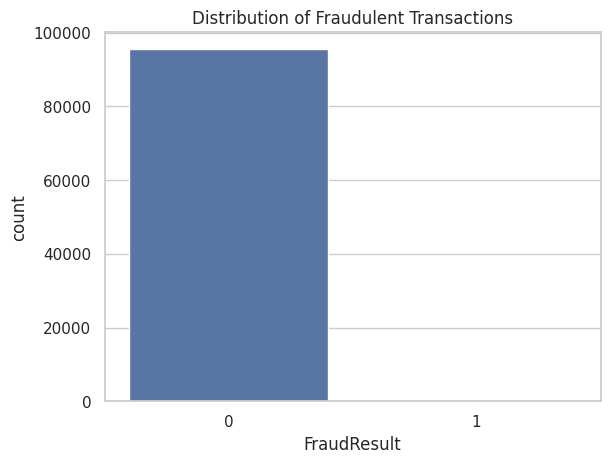

In [6]:
sns.countplot(x='FraudResult', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

3. Distribution of Numerical Features
Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.

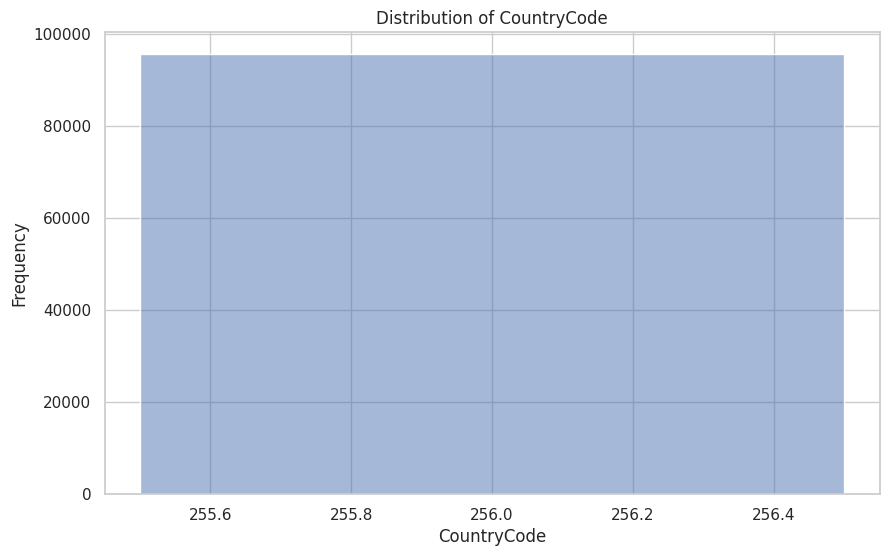

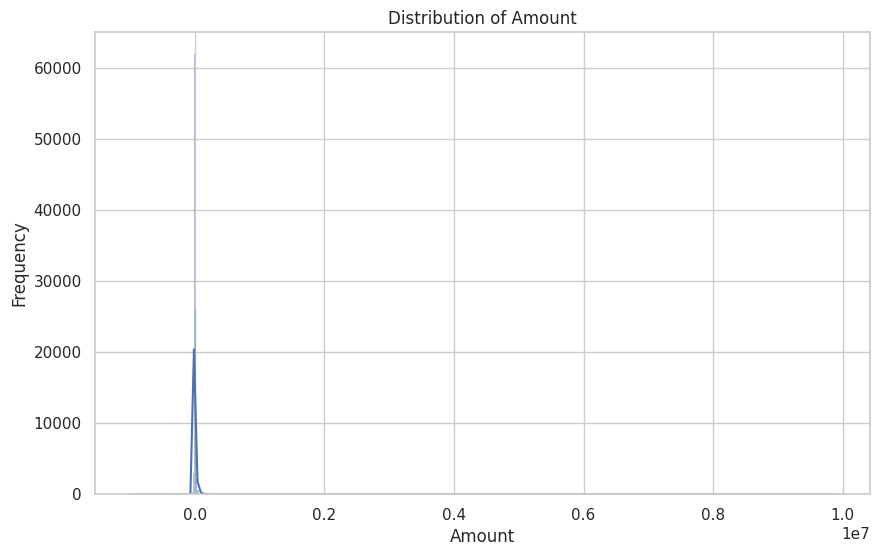

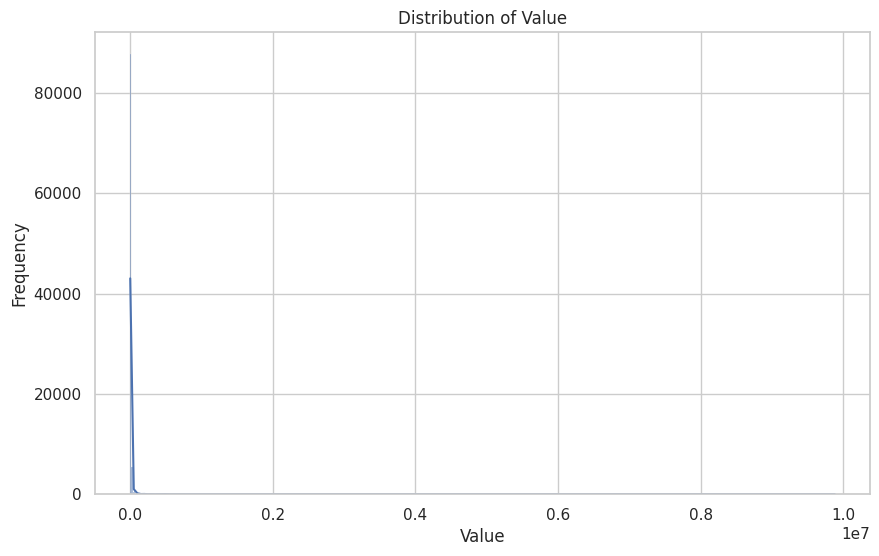

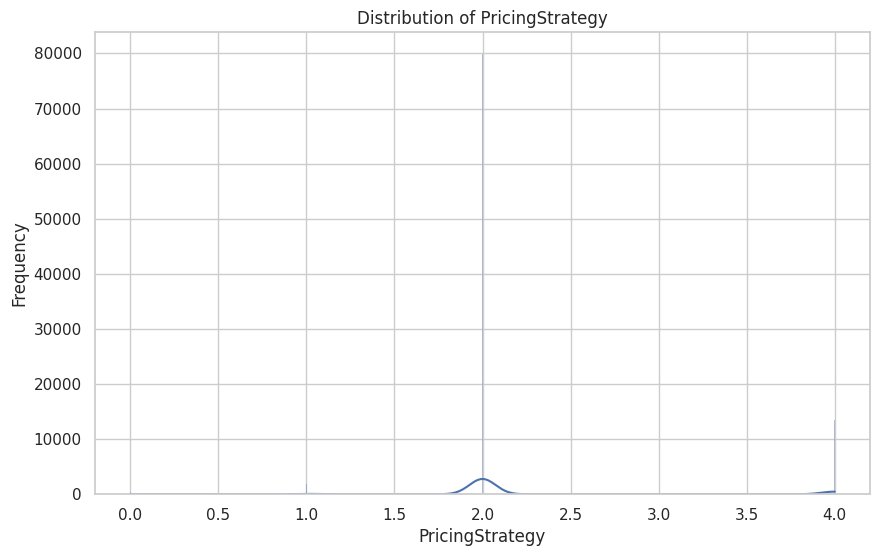

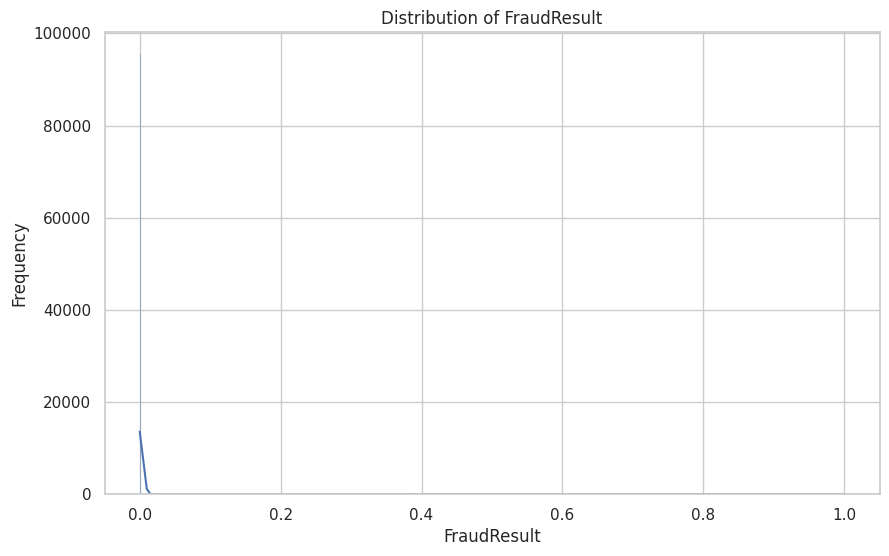

In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

4. Distribution of Categorical Features
Analyzing the distribution of categorical features provides insights into the frequency and variability of categories

In [8]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f'\nValue Counts for {col}:')
    print(df[col].value_counts())
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()


Value Counts for TransactionId:
TransactionId
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
                       ..
TransactionId_89881     1
TransactionId_91597     1
TransactionId_82501     1
TransactionId_136354    1
TransactionId_35670     1
Name: count, Length: 95662, dtype: int64


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7051942aa840> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x70518b43cb80> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

5. Correlation Analysis
Understanding the relationship between numerical features.

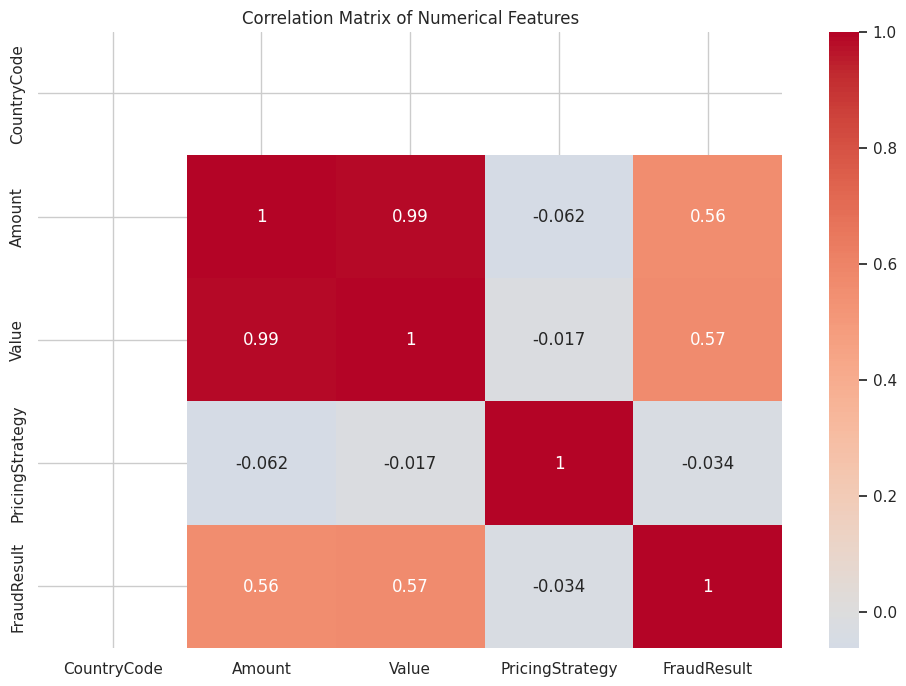

In [9]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

6. Identifying Missing Values
Identify missing values to determine missing data and decide on appropriate imputation strategies.

Missing Values in Each Column:
Series([], dtype: int64)


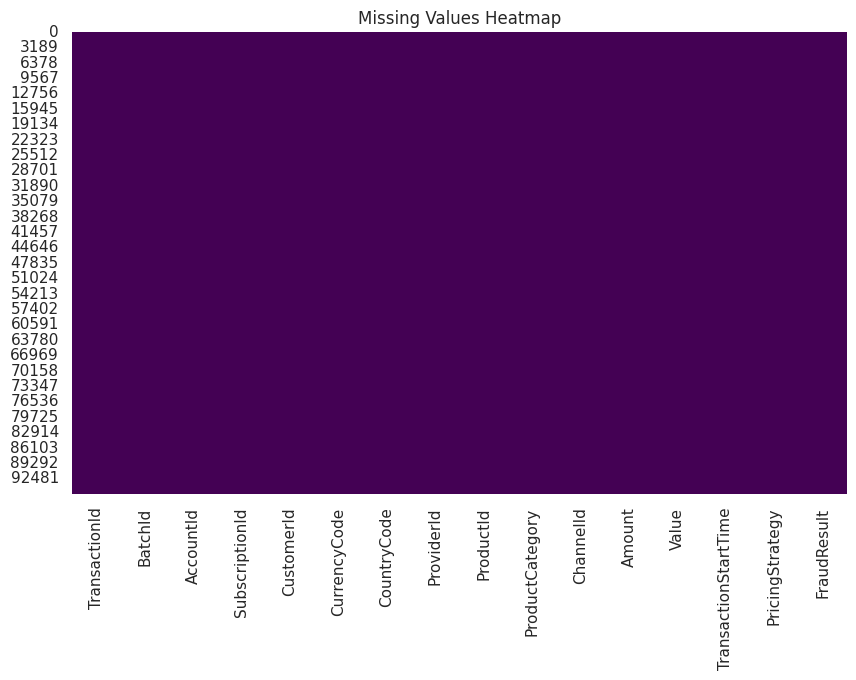

In [10]:
missing_values = df.isnull().sum()
print('Missing Values in Each Column:')
print(missing_values[missing_values > 0])
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

7. Outlier Detection
Use box plots to identify outliers.

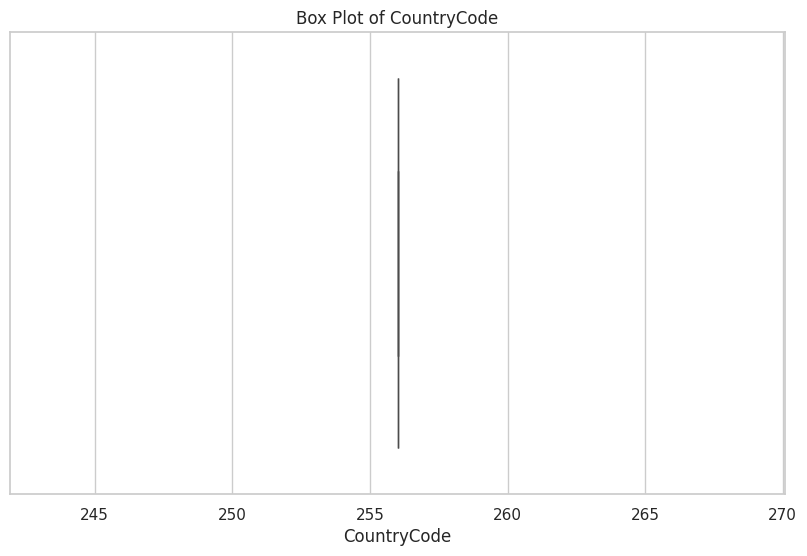

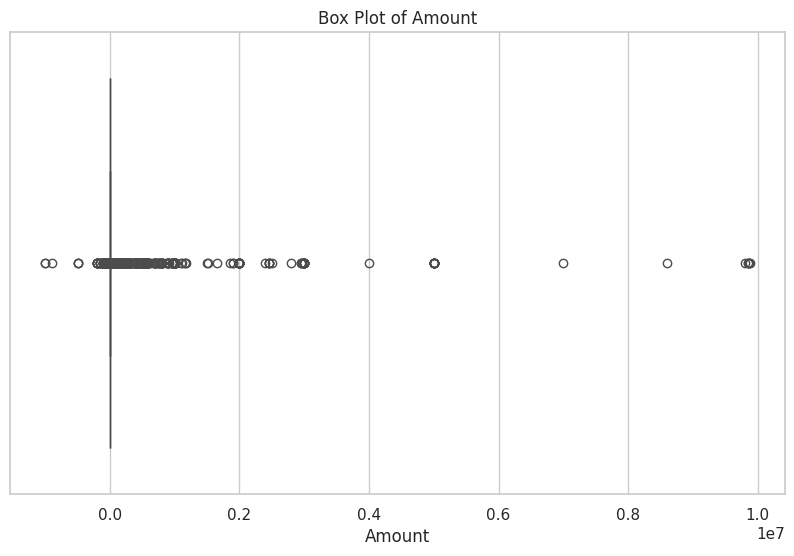

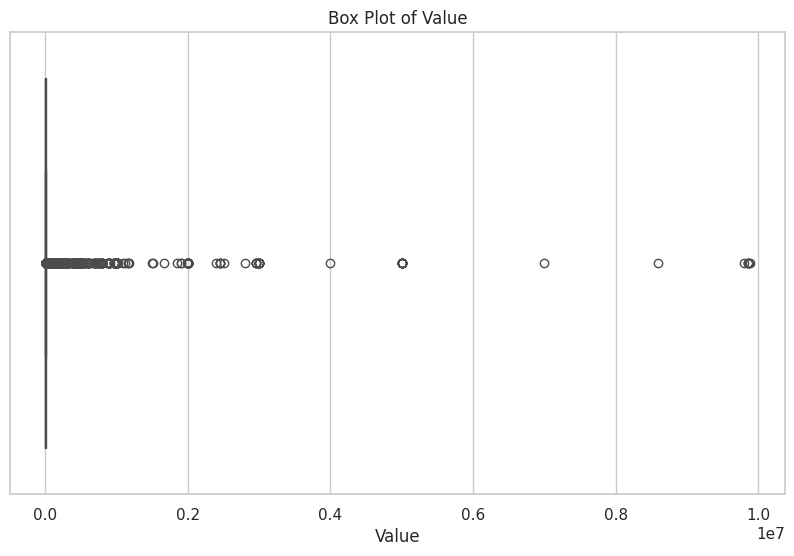

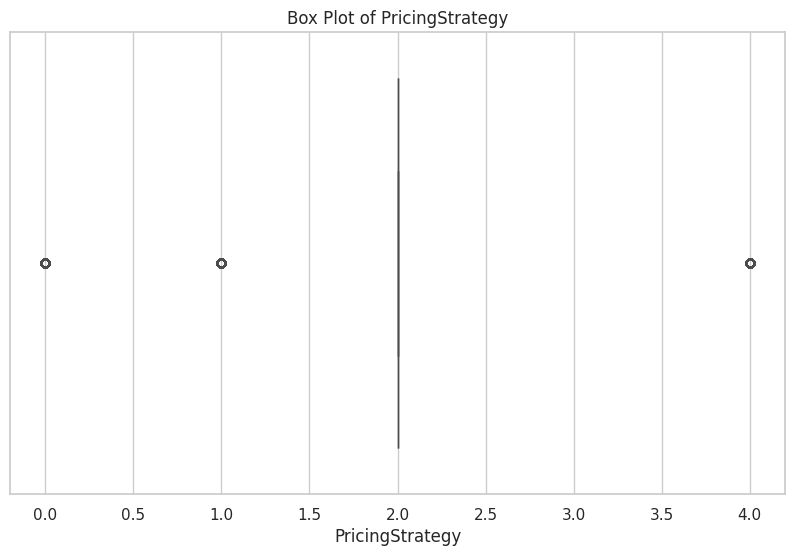

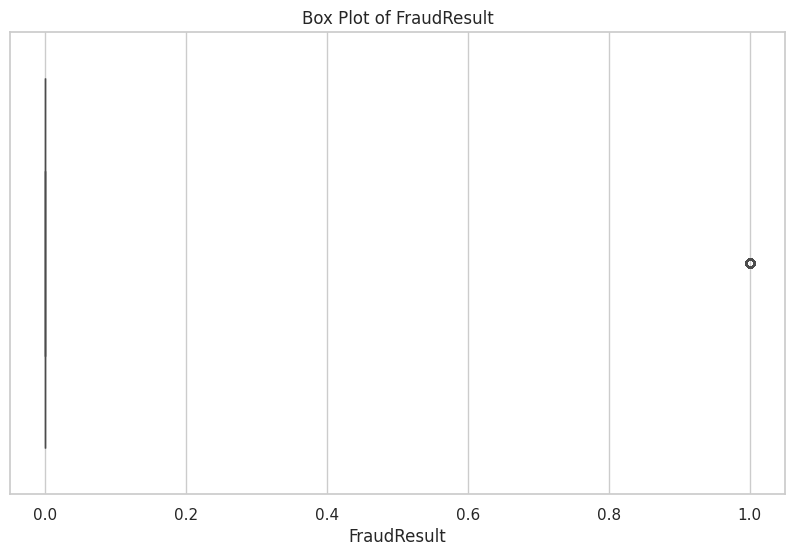

In [11]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

8. Key Insights
Based on the initial exploration, here are the top insights:
**Missing Values:** The dataset has no missing values, which is great for modeling.
**Transaction Amounts:** The 'Amount' column has negative values, which might represent refunds or reversals. This needs further investigation.
**Categorical Features:** Several columns are categorical (e.g., 'ProductCategory', 'ChannelId'). These will need to be encoded for machine learning models.
**Fraud Distribution:** The 'FraudResult' column is the target variable. It’s important to check its distribution to see if the dataset is imbalanced.

Visualize the distribution of FraudResult

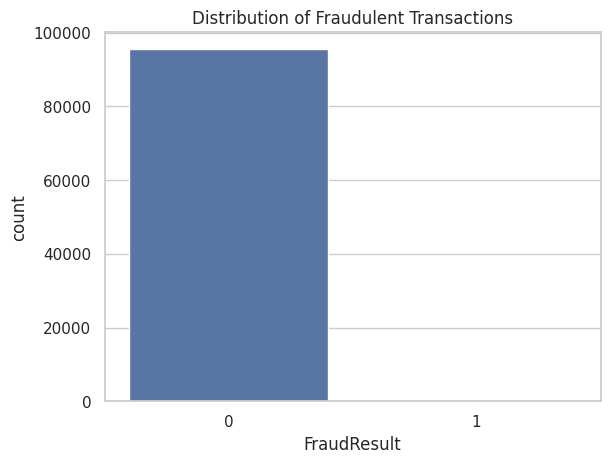

In [12]:
sns.countplot(x='FraudResult', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.show()